# Understanding what makes a good base stealer

In [57]:
import polars as pl

Let's begin by loading in sprint speed data, as usually we think of speed as a key factor in stealing bases.

In [58]:
sprint_speed_df = pl.read_csv("data/sprint_speed.csv")
sprint_speed_df.head()

"last_name, first_name",player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
str,i64,i64,str,str,i64,i64,i64,f64,f64
"""Turner, Trea""",607208,143,"""PHI""","""SS""",32,260,116,4.22,30.3
"""Scott II, Victor""",687363,138,"""STL""","""CF""",24,141,87,4.13,30.2
"""Witt Jr., Bobby""",677951,118,"""KC""","""SS""",25,245,101,4.15,30.2
"""Buxton, Byron""",621439,142,"""MIN""","""CF""",31,165,56,4.13,30.2
"""Hill, Derek""",656537,145,"""CWS""","""CF""",29,50,24,4.21,30.1


We don't really care about team info, position or age so lets drop those columns.


In [59]:
sprint_speed_df = sprint_speed_df.drop(["team", "team_id", "position", "age"])

In [60]:
sprint_speed_df.describe()

statistic,"last_name, first_name",player_id,competitive_runs,bolts,hp_to_1b,sprint_speed
str,str,f64,f64,f64,f64,f64
"""count""","""579""",579.0,579.0,161.0,513.0,579.0
"""null_count""","""0""",0.0,0.0,418.0,66.0,0.0
"""mean""",null,658505.848014,105.656304,12.863354,4.467446,27.336788
"""std""",null,49404.853133,74.106402,19.460054,0.1936,1.355807
"""min""","""Abrams, CJ""",455117.0,10.0,1.0,3.97,23.1
"""25%""",null,647351.0,37.0,1.0,4.33,26.5
"""50%""",null,669134.0,87.0,5.0,4.44,27.5
"""75%""",null,682177.0,164.0,16.0,4.58,28.3
"""max""","""d'Arnaud, Travis""",810938.0,297.0,116.0,5.22,30.3


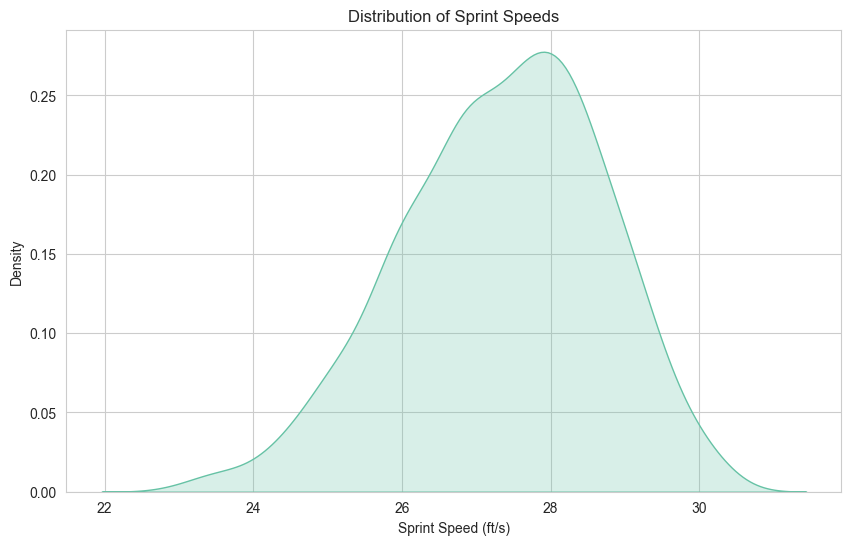

(27.336787564766837, 27.5, 30.3, 23.1)

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.kdeplot(data=sprint_speed_df.to_pandas(), x="sprint_speed", fill=True)
plt.title("Distribution of Sprint Speeds")
plt.xlabel("Sprint Speed (ft/s)")
plt.ylabel("Density")
plt.show()

# compute median and mean
mean_speed = sprint_speed_df["sprint_speed"].mean()
median_speed = sprint_speed_df["sprint_speed"].median()
max_speed = sprint_speed_df["sprint_speed"].max()
min_speed = sprint_speed_df["sprint_speed"].min()
mean_speed, median_speed, max_speed, min_speed

We see that sprint speed roughly follows a normal distribution with a mean of just over 27 feet per second. The fastest players can run at over 30 feet per second, while the slowest are around 23 feet per second.

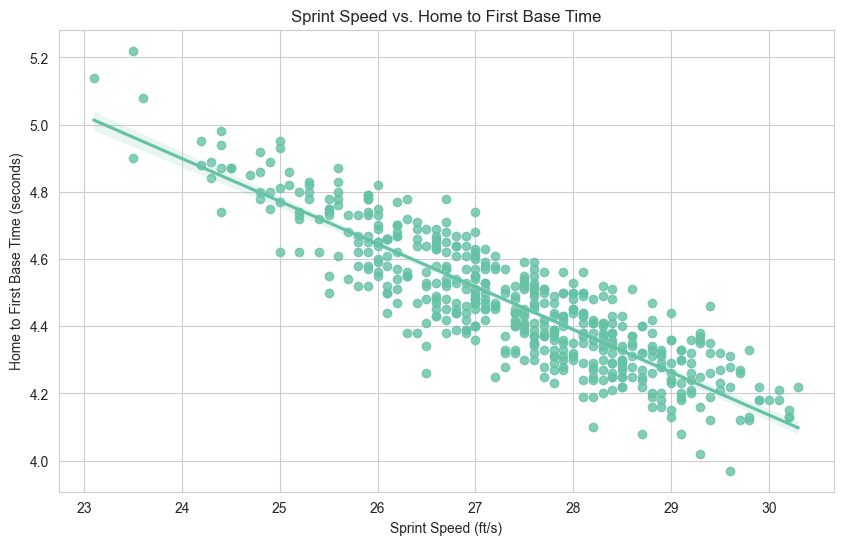

In [62]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.regplot(data=sprint_speed_df.to_pandas(), x="sprint_speed", y="hp_to_1b")
plt.title("Sprint Speed vs. Home to First Base Time")
plt.xlabel("Sprint Speed (ft/s)")
plt.ylabel("Home to First Base Time (seconds)")
plt.show()

In [63]:
base_stealing_run_value_df = pl.read_csv("data/basestealing_run_value.csv")
base_stealing_run_value_df.head()

player_id,player_name,team_name,start_year,end_year,key_target_base,runs_stolen_on_running_act,n_init,rate_sbx,n_sb,n_cs,n_pk,n_bk,n_fb,n_plus,n_minus,net_act_plus,net_act_minus,r_primary_lead,r_secondary_lead,r_sec_minus_prim_lead,r_primary_lead_sbx,r_secondary_lead_sbx,r_sec_minus_prim_lead_sbx
i64,str,str,i64,i64,str,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
660670,"""Acuña Jr., Ronald""","""ATL""",2025,2025,"""All""",1.021923,736,0.008152,6,0,0,1,0,7,0,-1.161061,2.786966,10.246484,13.295033,3.048549,11.081833,23.143,12.061167
657136,"""Wong, Connor""","""BOS""",2025,2025,"""All""",-0.394195,273,0.007326,1,1,0,0,0,1,1,-1.602971,-0.163556,10.761668,12.99445,2.232782,12.1295,21.75,9.6205
657557,"""DeJong, Paul""","""WSH""",2025,2025,"""All""",0.58607,258,0.011628,3,0,0,0,0,3,0,0.659833,1.009119,12.413188,16.211668,3.79848,12.188333,24.887333,12.699
643217,"""Benintendi, Andrew""","""CWS""",2025,2025,"""All""",0.149116,516,0.0,0,0,0,1,1,2,0,-3.398208,1.841683,12.060449,14.630764,2.570315,null,null,null
682653,"""Bernabel, Warming""","""COL""",2025,2025,"""All""",0.157734,202,0.00495,1,0,0,0,0,1,0,-0.730989,0.675403,13.685556,16.508735,2.823179,13.137,26.853,13.716


In [64]:
base_stealing_run_value_df = base_stealing_run_value_df.drop(
    ["team_name", "start_year", "end_year", "key_target_base"]
)


In [65]:
base_stealing_run_value_df = base_stealing_run_value_df.sort(
    "runs_stolen_on_running_act", descending=True
)

base_stealing_run_value_df.head()

player_id,player_name,runs_stolen_on_running_act,n_init,rate_sbx,n_sb,n_cs,n_pk,n_bk,n_fb,n_plus,n_minus,net_act_plus,net_act_minus,r_primary_lead,r_secondary_lead,r_sec_minus_prim_lead,r_primary_lead_sbx,r_secondary_lead_sbx,r_sec_minus_prim_lead_sbx
i64,str,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
665742,"""Soto, Juan""",5.503209,1174,0.025554,30,0,0,1,1,32,0,17.955622,4.249077,11.509849,15.638273,4.128425,14.639069,28.826897,14.187828
596115,"""Story, Trevor""",4.253335,978,0.025562,24,1,0,2,1,27,1,17.466453,1.688989,12.458037,15.904701,3.446664,12.18656,23.591,11.40444
665833,"""Cruz, Oneil""",3.950578,768,0.049479,33,5,0,0,0,33,5,25.752128,-2.666329,12.195276,15.832649,3.637373,12.032474,19.989237,7.956763
802415,"""Simpson, Chandler""",3.747584,854,0.053864,38,8,0,0,2,40,8,30.7201,-5.325413,11.999281,15.166783,3.167502,12.139435,22.065543,9.926109
621439,"""Buxton, Byron""",3.605057,764,0.027487,21,0,0,0,0,21,0,12.880903,2.286392,12.744675,15.66407,2.919395,12.13819,22.150238,10.012048


In [ ]:
base_stealing_run_value_df = base_stealing_run_value_df.rename(
    {
        "runs_stolen_on_running_act": "runner_stealing_runs",
        "n_init": "num_steal_opportunities",
        "rate_sbx": "percentage_steal_opportunities_taken",
        "n_sb": "successful_steals",
        "n_cs": "caught_stealing",
        "n_pk": "pickoffs",
        "n_bk": "balks",
        "n_fb": "forced_balks",
        "n_plus": "based_gained_sb_plus_balks",
        "n_minus": "outs_created_cs_plus_pickoffs",
        "net_act_plus": "bases_gained_vs_avg",
        "net_act_minus": "outs_created_vs_avg",
        "r_primary_lead": "primary_lead_all_sb_opportunities",
        "r_secondary_lead": "secondary_lead_all_sb_opportunities",
        "r_sec_minus_prim_lead": "difference_secondary_minus_primary_lead_all_sb_opportunities",
        "r_primary_lead_sbx": "primary_lead_steal_attempts",
        "r_secondary_lead_sbx": "secondary_lead_steal_attempts",
        "r_sec_minus_prim_lead_sbx": "difference_secondary_minus_primary_lead_steal_attempts",
    }
)

In [68]:
base_stealing_run_value_df = base_stealing_run_value_df.with_columns(
    (pl.col("percentage_steal_opportunities_taken") * 100).alias(
        "percentage_steal_opportunities_taken"
    )
)

In [69]:
base_stealing_run_value_df.head()

player_id,player_name,runner_stealing_runs,num_steal_opportunities,percentage_steal_opportunities_taken,successful_steals,caught_stealing,pickoffs,balks,forced_balks,based_gained_sb_plus_balks,outs_created_cs_plus_pickoffs,bases_gained_vs_avg,outs_created_vs_avg,primary_lead_all_sb_opportunities,secondary_lead_all_sb_opportunities,difference_secondary_minus_primary_lead_all_sb_opportunities,primary_lead_steal_attempts,secondary_lead_steal_attempts,difference_secondary_minus_primary_lead_steal_attempts
i64,str,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
665742,"""Soto, Juan""",5.503209,1174,2.555366,30,0,0,1,1,32,0,17.955622,4.249077,11.509849,15.638273,4.128425,14.639069,28.826897,14.187828
596115,"""Story, Trevor""",4.253335,978,2.556237,24,1,0,2,1,27,1,17.466453,1.688989,12.458037,15.904701,3.446664,12.18656,23.591,11.40444
665833,"""Cruz, Oneil""",3.950578,768,4.947917,33,5,0,0,0,33,5,25.752128,-2.666329,12.195276,15.832649,3.637373,12.032474,19.989237,7.956763
802415,"""Simpson, Chandler""",3.747584,854,5.386417,38,8,0,0,2,40,8,30.7201,-5.325413,11.999281,15.166783,3.167502,12.139435,22.065543,9.926109
621439,"""Buxton, Byron""",3.605057,764,2.748691,21,0,0,0,0,21,0,12.880903,2.286392,12.744675,15.66407,2.919395,12.13819,22.150238,10.012048


now lets join the dataframes and see how much speed impacts these metrics

In [70]:
sprint_speed_df.shape, base_stealing_run_value_df.shape

((579, 6), (423, 20))

In [ ]:
unique_bs_df_ids = (
    base_stealing_run_value_df.select("player_id").unique().to_series().to_list()
)
sprint_speed_df = sprint_speed_df.filter(pl.col("player_id").is_in(unique_bs_df_ids))
sprint_speed_df.shape

(423, 6)

In [75]:
df = base_stealing_run_value_df.join(sprint_speed_df, on="player_id", how="inner")
df = df.drop("last_name, first_name")
df.shape

(423, 24)

In [76]:
df.head()

player_id,player_name,runner_stealing_runs,num_steal_opportunities,percentage_steal_opportunities_taken,successful_steals,caught_stealing,pickoffs,balks,forced_balks,based_gained_sb_plus_balks,outs_created_cs_plus_pickoffs,bases_gained_vs_avg,outs_created_vs_avg,primary_lead_all_sb_opportunities,secondary_lead_all_sb_opportunities,difference_secondary_minus_primary_lead_all_sb_opportunities,primary_lead_steal_attempts,secondary_lead_steal_attempts,difference_secondary_minus_primary_lead_steal_attempts,competitive_runs,bolts,hp_to_1b,sprint_speed
i64,str,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64
607208,"""Turner, Trea""",2.657918,1161,2.497847,26,3,1,0,0,26,4,12.902507,0.172037,12.228693,16.082151,3.853457,12.810552,25.851241,13.04069,260,116,4.22,30.3
687363,"""Scott II, Victor""",3.430572,606,5.445545,30,3,2,0,0,30,5,24.118028,-3.095629,12.242257,16.479348,4.237091,12.80303,22.986333,10.183303,141,87,4.13,30.2
677951,"""Witt Jr., Bobby""",2.799185,990,3.939394,32,7,0,2,0,34,7,22.595745,-3.822143,13.119604,17.50609,4.386486,12.535462,22.921923,10.386462,245,101,4.15,30.2
621439,"""Buxton, Byron""",3.605057,764,2.748691,21,0,0,0,0,21,0,12.880903,2.286392,12.744675,15.66407,2.919395,12.13819,22.150238,10.012048,165,56,4.13,30.2
656537,"""Hill, Derek""",1.259854,204,3.431373,7,0,0,0,0,7,0,5.111694,0.527812,12.791267,16.978672,4.187405,11.39,20.444,9.054,50,24,4.21,30.1


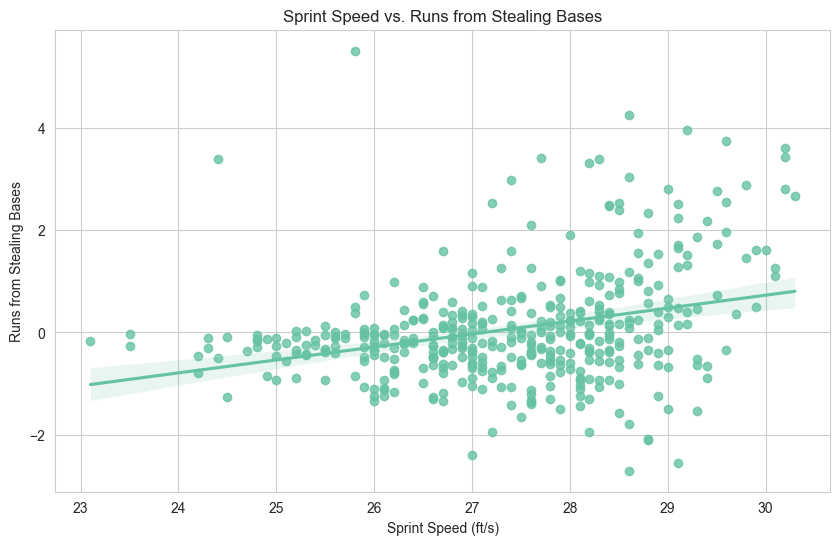

In [78]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.regplot(data=df.to_pandas(), x="sprint_speed", y="runner_stealing_runs")
plt.title("Sprint Speed vs. Runs from Stealing Bases")
plt.xlabel("Sprint Speed (ft/s)")
plt.ylabel("Runs from Stealing Bases")
plt.show()

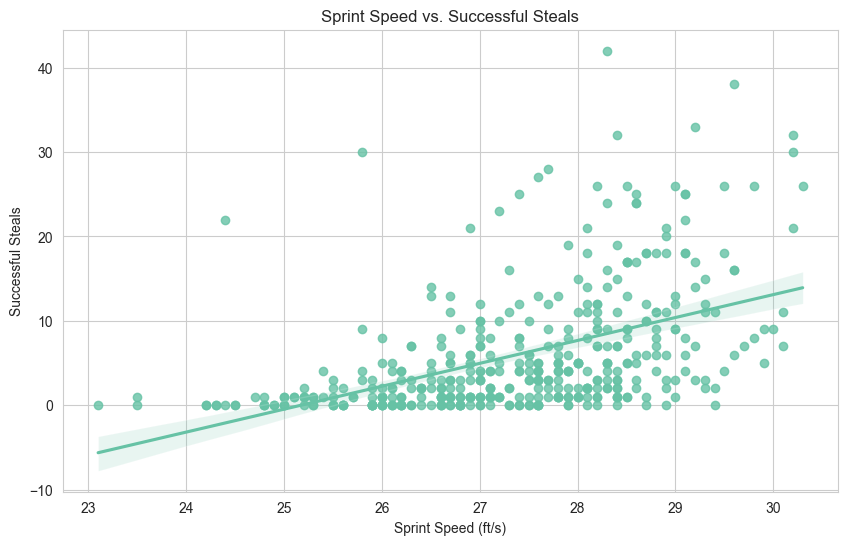

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.regplot(data=df.to_pandas(), x="sprint_speed", y="successful_steals")
plt.title("Sprint Speed vs. Successful Steals")
plt.xlabel("Sprint Speed (ft/s)")
plt.ylabel("Successful Steals")
plt.show()

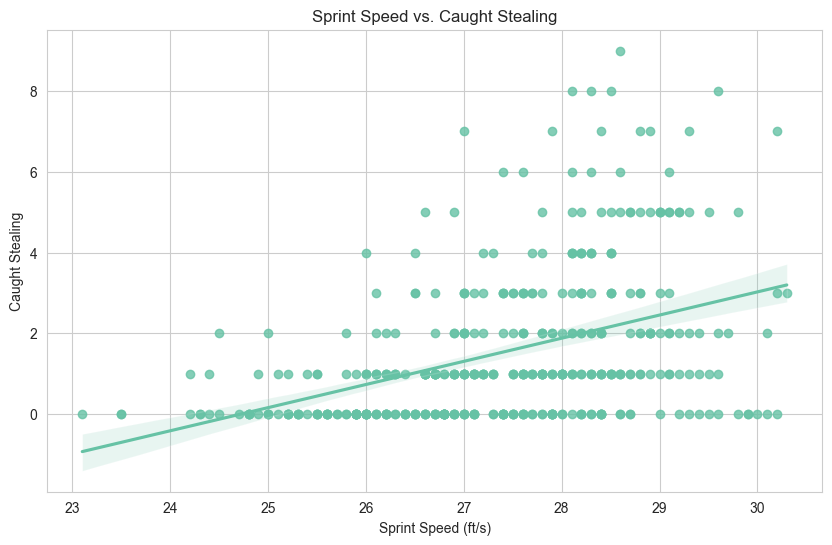

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.regplot(data=df.to_pandas(), x="sprint_speed", y="caught_stealing")
plt.title("Sprint Speed vs. Caught Stealing")
plt.xlabel("Sprint Speed (ft/s)")
plt.ylabel("Caught Stealing")
plt.show()